In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation, rc
    
GIT = 'https://github.com/tyokokur/tmpdat/raw/main/nfh/'

###COOLWARM COLORMAP DOCUMENTATION  
#https://depts.washington.edu/airqual/coolwarm.m
#Base blue: RGB = [59 76 192]
#Base red:  RGB = [180 4 38]
warm_red = [180/255, 4/255, 38/255]
cool_blue = [59/255,76/255,192/255]
mix_purp = np.divide(np.add(warm_red,cool_blue),2).tolist()

tjy_udf:  ['H_find', 'Kap_D', 'git_sync', 'lighten_color', 'plot_anim', 'plot_pha', 'ticks']


Files:
 ['phb2c0_c004.dat', 'phb2c0_c005.dat', 'phb2c0_c006.dat', 'phb2c0_c008.dat', 'phb2c0_c010.dat', 'phb2c0_c015.dat', 'phb2c0_c020.dat', 'phb2c0_c030.dat', 'phb2c0_c040.dat', 'phb2c0_c050.dat']
thresh
[139.85117226779573, 124.53399675500272, 113.91739040742651, 100.95606781257358, 93.02377647589003, 80.43750982961991, 71.04823745973309, 55.62459542344892, 46.42287153652393, 42.92919471824437]


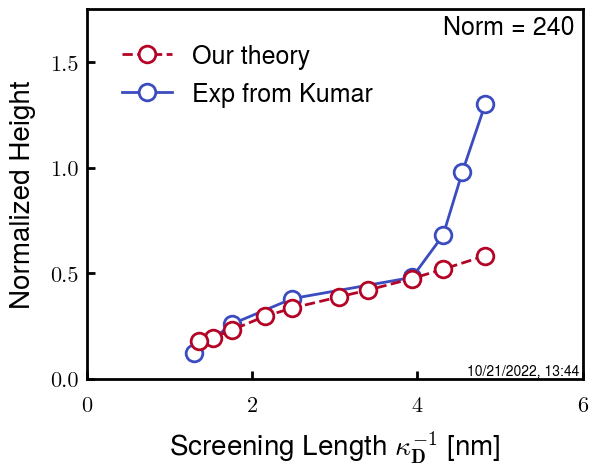

maxpt
[20.044631988090067, 18.639878604356213, 18.039140863035822, 17.322363688735788, 16.763691705238205, 16.280274923301647, 16.004620044653283, 15.06575306772797, 14.12427280003009, 16.64680527783559]


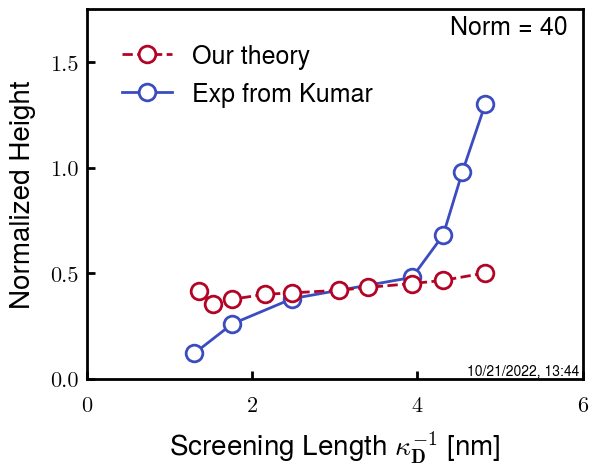

norm
[53.93992507588128, 46.81729551375013, 42.91996750975077, 37.999588931775136, 34.46422722394495, 29.212117142062443, 26.173325284665324, 22.734018778248124, 20.695699614411584, 25.166655831662208]


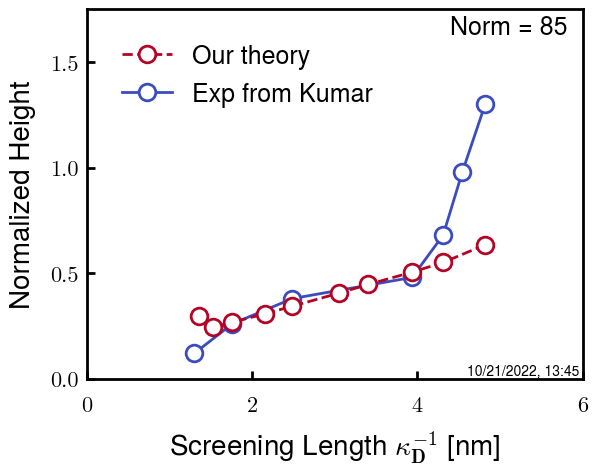

In [2]:
## NFH
from datetime import datetime
labs =  ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
tack = [0]*len(labs) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb2c0_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(labs)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]
algs = ['thresh', 'maxpt', 'norm']

##########################################
##########################################
b0 = 2.0 
norms = [240, 40, 85]
thresh = 1e-04
##########################################
##########################################

for algind in range(3):
    print(algs[algind])
    LH = np.zeros(len(read_list))
    print("[", end="")
    for i in range(len(read_list)): 
      LH[i] = tjy.H_find(read_list[i], alg=algs[algind], b0=b0, thresh=thresh)
      print(LH[i], end="")
      if i!=(len(read_list)-1): print(", ", end="")
    print("]")

    ####################


    SrCs = [float(i) for i in labs]
    Sr_equil = LH
    Sr_equil = np.divide(Sr_equil,  norms[algind])
    CsDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in SrCs]

    #Sr2014 pH2.4 fitted in Illustrator
    x = [4, 4.5, 5, 6, 15, 30, 55]
    y = [1.3, 0.98, 0.68, 0.48, 0.38, 0.26, 0.12]
    xDeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in x]

    f, ax = plt.subplots(1,1)

    ax.plot(CsDeb, Sr_equil, 'o--', color=warm_red, mew=2, ms=12, markerfacecolor='w', zorder=3, label="Our theory")
    ax.plot(xDeb, y, 'o-', color=cool_blue, mew=2, ms=12, markerfacecolor='w',label="Exp from Kumar")

    plt.gca().text(0.85, 0.95, 'Norm = {:.0f}'.format(norms[algind]), transform=plt.gca().transAxes, fontsize=18,
           ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
    plt.gca().text(0.88, 0.02, '{}'.format(datetime.now().strftime("%m/%d/%Y, %H:%M")), transform=plt.gca().transAxes, fontsize=10,
           ha='center', va='center', bbox=dict(boxstyle='square', facecolor='none', edgecolor='none'))
    ax.set_title(r"")
    ax.set_ylim(0, 1.75) #0.5
    plt.yticks([0.0, 0.5, 1.0, 1.5])
    plt.xticks([0, 2, 4, 6, 8])
    ax.set_xlim(0,6) #2

    ax.set_xlabel(r'Screening Length $\mathbf{\kappa_D^{-1}}$'+' [nm]')
    ax.set_ylabel('Normalized Height')

    leg = ax.legend(loc = 2,frameon=False,fontsize=18)

    tjy.ticks()
    plt.show()



In [4]:
## NLH
read_list =  ['001', '002', '003', '005', '010', '025', '050', '100']
tack = [0]*len(read_list) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb10v10L_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(read_list)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]

LH = np.zeros(len(read_list))
print("[", end="")
for i in range(len(read_list)): 
  print(tjy.H_find(read_list[i], 'thresh', b0=1.0, thresh=1e-04), end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

Files:
 ['phb10v10L_c001.dat', 'phb10v10L_c002.dat', 'phb10v10L_c003.dat', 'phb10v10L_c005.dat', 'phb10v10L_c010.dat', 'phb10v10L_c025.dat', 'phb10v10L_c050.dat', 'phb10v10L_c100.dat']
[68.34699152542375, 57.42980085348506, 44.823931544865864, 12.606502983019732, 12.83866581024041, 9.819984639226947, 9.319878371324167, 8.940699096815084]


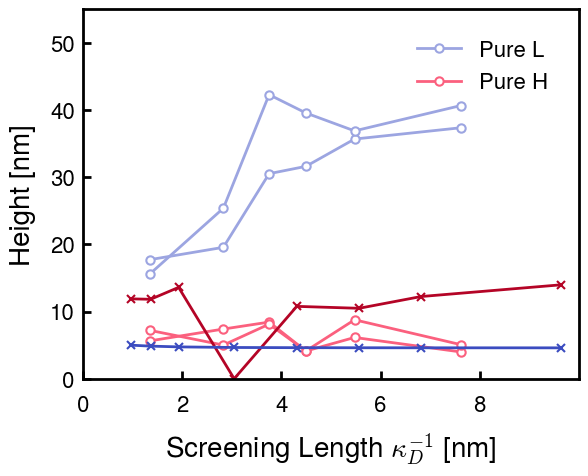

In [5]:
cs = [1, 2, 3, 5, 10, 25, 50, 100]
H = [13.977767269736841, 12.230987520347261, 10.480678101316315, 10.768363064008394, 0, 13.594751358969196, 11.822587615484462, 11.887211830309875]
L = [4.595602353072689, 4.602396738385638, 4.608961171314099, 4.621387665198238, 4.650016781083143, 4.738895820217338, 4.851848339857909, 4.994140109890109]
deb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in cs]

#EAD 20220705 Data
EADcs = [1.6, 3.1, 4.6, 6.6, 11.6, 51.6]
EADdeb = [1/tjy.Kap_D(i*1e-3)*1e9 for i in EADcs]
EADL_1 = [37.3503292, 35.66635517, 31.60367327, 30.51213493, 19.55555023, 17.70957033]
EADL_2 = [40.65413833, 36.88049873, 39.54620197, 42.27351153, 25.3742907, 15.54885597]
EADH_1 = [3.982809973, 6.14174949, 4.122060533, 8.4279967, 7.393286337, 5.624564563]
EADH_2 = [5.065632817, 8.7720967, 4.13424014, 8.122542053, 5.0094431, 7.20754611]

f, ax = plt.subplots(1,1)

ax.plot(EADdeb, EADL_1, 'o-', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="Pure L")
ax.plot(EADdeb, EADL_2, 'o-', color=tjy.lighten_color(cool_blue,0.5), mew=1.5, markerfacecolor='w',label="_Pure L")
ax.plot(EADdeb, EADH_1, 'o-', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="Pure H")
ax.plot(EADdeb, EADH_2, 'o-', color=tjy.lighten_color(warm_red,0.5), mew=1.5, markerfacecolor='w',label="_Pure H")


ax.plot(deb, H, color=warm_red, marker='x')
ax.plot(deb, L, color=cool_blue, marker='x')

plt.xticks([0, 2, 4, 6, 8])
ax.set_xlim(0, 10)
ax.set_ylim(0, 55)
ax.set_title(r"")
ax.set_xlabel(r'Screening Length $\kappa_D^{-1}$'+' [nm]')
ax.set_ylabel('Height' ' [nm]')

leg = ax.legend(frameon=False,fontsize=16)
leg.get_frame().set_linewidth(0.0)


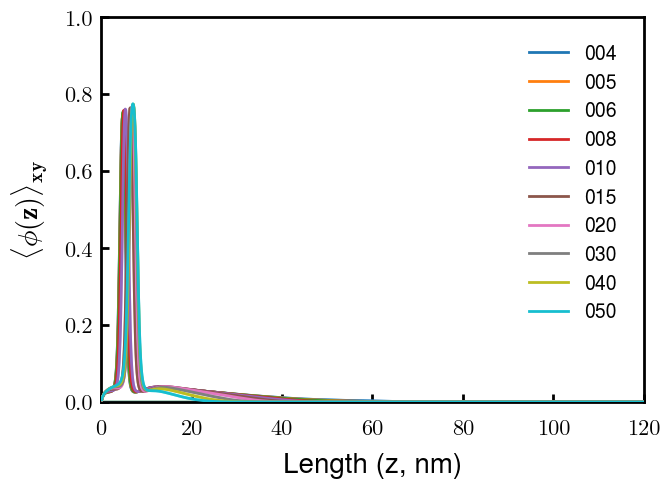

In [6]:
labs = ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
read_list = [GIT+"phb1c0_c"+i+".dat" for i in labs]
# read_list = [GIT+"ph_a021c"+i+"_x103s002.dat" for i in labs]
# labs = ['001', '002', '003', '005', '010', '025', '050', '100']
# read_list = [GIT+"phb10v10L_c"+i+".dat" for i in labs]

tjy.plot_pha(read_list, b0=1.0, x1_end=120, x2_end=150, y2_end=0.02, labs=labs, double=False)

In [4]:
anim = tjy.plot_anim(GIT+'it_a021c004_x110s002.dat', simname = GIT+'SIM.dat', lx=150)
plt.show()

it len  2329
nframes calc  2329
phn len  2330


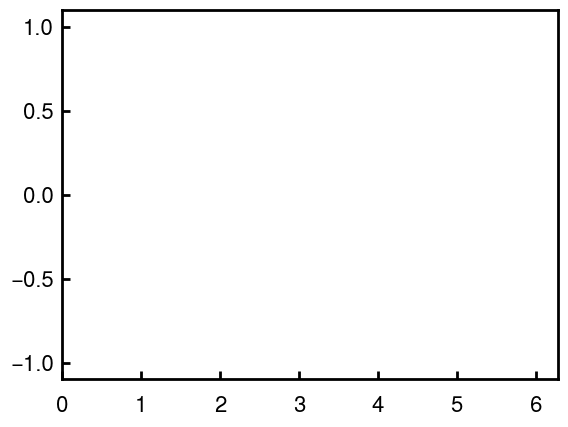

In [3]:
from IPython.display import HTML, display
from matplotlib import animation
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot([])   # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)
def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20)

In [64]:
labs =  ['004', '005', '006', '008', '010', '015', '020', '030', '040', '050']
tack = [0]*len(labs) #see add for options
#tack[8:9] = [1]*2
#tack[10:] = [2]*6
add = ['', '_1C', '_']
read_list = ['phb204_c'+add[tack[ind]]+i+'.dat' for ind, i in enumerate(labs)]
print("Files:\n", read_list)
read_list = [GIT+i for i in read_list]

b0 = 2.0 ########################################################

print("[", end="")
for i in range(len(read_list)): 
  print(Gibbsf(read_list[i], b0), end="")
  if i!=(len(read_list)-1): print(", ", end="")
print("]")

Files:
 ['phb204_c004.dat', 'phb204_c005.dat', 'phb204_c006.dat', 'phb204_c008.dat', 'phb204_c010.dat', 'phb204_c015.dat', 'phb204_c020.dat', 'phb204_c030.dat', 'phb204_c040.dat', 'phb204_c050.dat']
[47.072316105215066, 43.80163822417714, 40.553781442826605, 33.74345145045215, 26.435680243045564, 20.04621971732655, 18.616687699146954, 17.685826677916314, 17.493512107544532, 17.10685582144304]


In [8]:
read_list = ['040', '050', '060', '070', '075', '080', '085', '090', '095', '100', '105', '110', '115', '120', '125',
              '130', '135', '140', '145', '150', '155', '160', '165', '170', '175', '180', '185', '190', '195', '200']
x = [float(i)/100 for i in read_list]
read_list = ['p1a0_x'+i+'.dat' for i in read_list]
H = [Gibbsf(i, 1.0) for i in read_list]

FileNotFoundError: [Errno 2] No such file or directory: 'p1a0_x040.dat'

In [9]:
plt.plot(x, H, 'o')

NameError: name 'H' is not defined

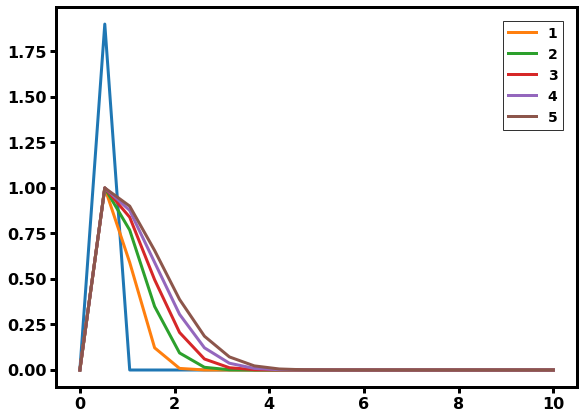

In [ ]:
plt.figure()
x = np.linspace(0,10,20)
dx = x[1]-x[0]
y = [0] + [1/dx]+[0]*(len(x)-2)
plt.plot(x, y)

for i in [1, 2, 3, 4, 5]:
  yg = np.exp(-(x-x[1])**2/(i*dx))
  yg[0] = 0    
  plt.plot(x, yg, label=i)
plt.legend()
plt.show()